In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

modelpath='./MNIST_CNN.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

In [14]:
history=model.fit(X_train,y_train,validation_split=0.25,epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])

print('\n Test Accuracy:%.4f'%(model.evaluate(X_test,y_test)[1]))


Epoch 1: val_loss improved from inf to 0.09207, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.09207 to 0.06070, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06070 to 0.05410, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05410 to 0.04581, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04581

Epoch 6: val_loss improved from 0.04581 to 0.04377, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss did not improve from 0.04377

Epoch 8: val_loss improved from 0.04377 to 0.04157, saving model to ./MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04157

Epoch 10: val_loss did not improve from 0.04157

Epoch 11: val_loss did not improve from 0.04157

Epoch 12: val_loss did not improve from 0.04157

Epoch 13: val_loss did not improve from 0.04157

Epoch 14: val_loss improved from 0.04157 to 0.04151, saving model to ./MNIST_CNN.hdf5

Epoch 15: val_loss improved from 0.04151 to 0.04151, saving 

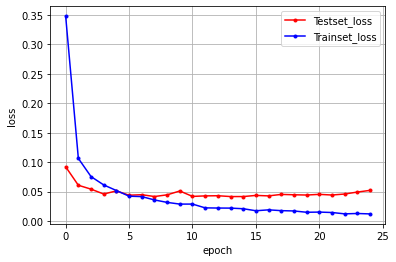

In [16]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()